In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

# Computing in Carbon

## Modeling Neurons

- looking at a single neuron

- neuroelectronics: membranes, ion channels, wiring 
- neuron excitability 
- dendrite computing...

Equivalent circuit model: convert the neuron to a electric circuit ...

- the lipid bilayer acts as capictor...


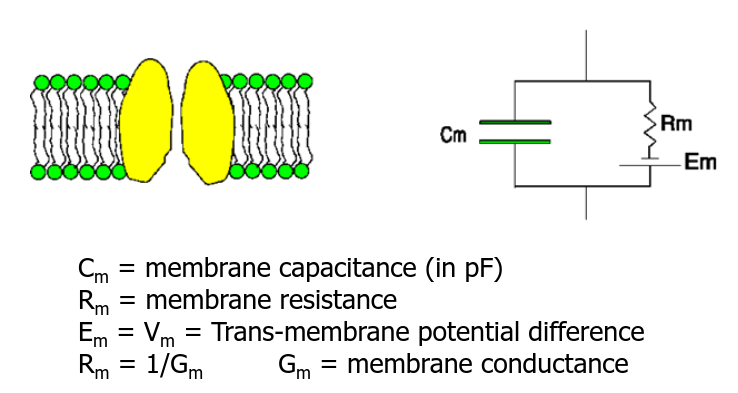

In [2]:
Image(filename= "elcircuit.png", width=400)

from Kirchoeff's law

$I_R + T_C + I_{ext} = 0$

from Ohm's law

$I_R = V/R$

$C = Q/V$ where $Q$ is the charge

take the derivative of this equation

$I_C = C \frac{dV}{dt}$

by substitution in Kirchoeff's law

$I_R + C \frac{dV}{dt} + I_{ext} = 0$

$C \frac{dV}{dt} = - I_R +  I_{ext}$

$C \frac{dV}{dt} = - \frac{V- V_R}{R} +  I_{ext}$


In the cell, there is equilibrium potentials ...

Ernest's potential

$E = \frac{k_B T}{zq} \ln \frac{inside}{outside}$

$k_B$ boltzman const

$T$ temprature

$q$ ionic charge

$z$ number of charges

resistor = ion channels & capacitor = lipid bilayer & battery = ion gradient

ions channels: many types 
    
- ca channels
- voltage dependents
- heat senstive ... etc

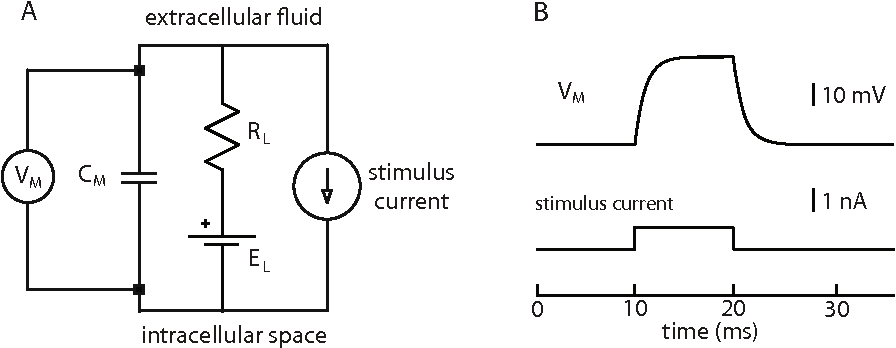

In [3]:
Image(filename= "spike_neurons.png", width=400)

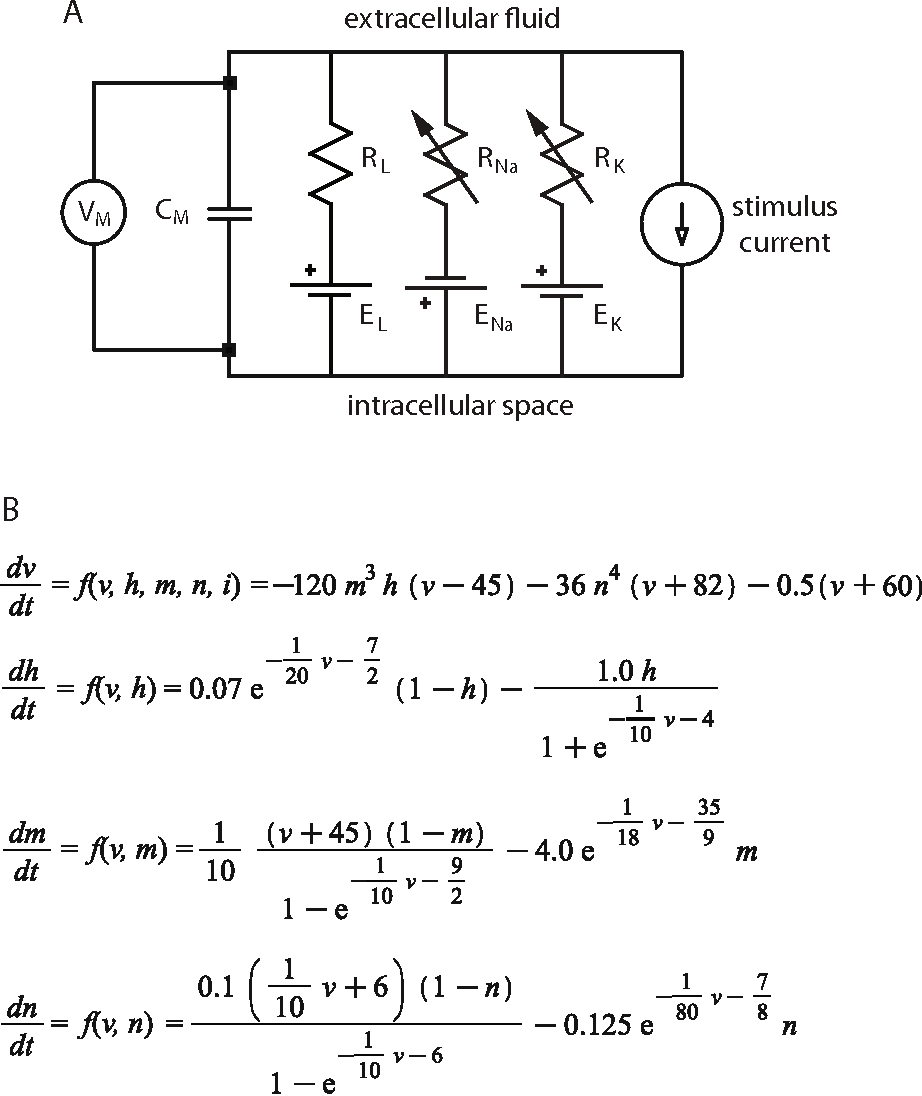

In [4]:
Image(filename= "spike_neurons2.png", width=400)

C = 0.010 nF
R = 1000.000 M ohms
tau = 10.000 ms
(Theoretical)
tau = 10.000 ms
(Experimental)


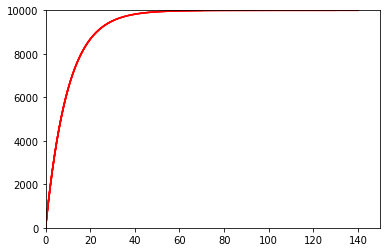

In [19]:
from __future__ import print_function
"""
Created on Wed Apr 22 15:53:00 2015

Charging and discharging curves for passive membrane patch
R Rao 2007

translated to Python by rkp 2015
"""

import numpy as np
import matplotlib.pyplot as plt

# input current
I = 10 # nA

# capacitance and leak resistance

C = 0.01 # nF
R = 1000 # M ohms
tau = R*C # = 0.1*100 nF-Mohms = 100*100 pF Mohms = 10 ms
print('C = %.3f nF' % C)
print('R = %.3f M ohms' % R)
print('tau = %.3f ms' % tau)
print('(Theoretical)')

# membrane potential equation dV/dt = - V/RC + I/C

tstop = 150 # ms

V_inf = I*R # peak V (in mV)
tau = 0 # experimental (ms)

h = 0.2 # ms (step size)

V = 0 # mV
V_trace = [V] # mV

for t in np.arange(h, tstop, h):

   # Euler method: V(t+h) = V(t) + h*dV/dt
   V = V +h*(- (V/(R*C)) + (I/C))

   # Verify membrane time constant
   if (not tau and (V > 0.6321*V_inf)):
     tau = t
     print('tau = %.3f ms' % tau)
     print('(Experimental)')

   
   # Stop current injection 
   #if t >= 0.6*tstop:
   #  I = 0

   V_trace += [V]
   if t % 10 == 0:
       plt.plot(np.arange(0,t+h, h), V_trace, color='r')
       plt.xlim(0, tstop)
       plt.ylim(0, V_inf)
       plt.draw()
       
plt.show()

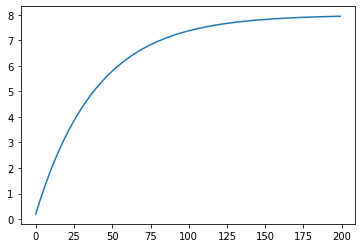

In [42]:
from __future__ import print_function
"""
Created on Wed Apr 22 16:02:53 2015

Basic integrate-and-fire neuron 
R Rao 2007

translated to Python by rkp 2015
"""

import numpy as np
import matplotlib.pyplot as plt


# input current
I = 0.2 # nA

# capacitance and leak resistance
C = 1 # nF
R = 40 # M ohms

# I & F implementation dV/dt = - V/RC + I/C
# Using h = 1 ms step size, Euler method

V = 0
tstop = 200
abs_ref = 5 # absolute refractory period 
ref = 0 # absolute refractory period counter
V_trace = []  # voltage trace for plotting
V_th = 10 # spike threshold

for t in range(tstop):
  
   if not ref:
       V = V - (V/(R*C)) + (I/C)
   else:
       ref -= 1
       V = 0.2 * V_th # reset voltage
   
   if V > V_th:
       V = 50 # emit spike
       ref = abs_ref # set refractory counter

   V_trace += [V]


plt.plot(V_trace)
plt.show()

In [32]:
34/200

0.17

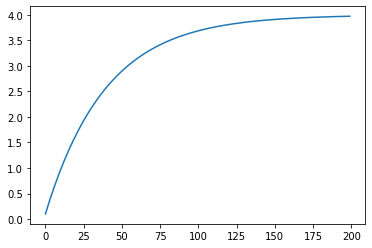

In [48]:
from __future__ import print_function
"""
Created on Wed Apr 22 16:02:53 2015

Basic integrate-and-fire neuron 
R Rao 2007

translated to Python by rkp 2015
"""

import numpy as np
import matplotlib.pyplot as plt


# input current
I = 0.1 # nA

# capacitance and leak resistance
C = 1 # nF
R = 40 # M ohms

# I & F implementation dV/dt = - V/RC + I/C
# Using h = 1 ms step size, Euler method

V = 0
tstop = 200
abs_ref = 5 # absolute refractory period 
ref = 0 # absolute refractory period counter
V_trace = []  # voltage trace for plotting
V_th = 10 # spike threshold
spiketimes = [] # list of spike times

# input current
noiseamp = 0 # amplitude of added noise
I += noiseamp*np.random.normal(0, 1, (tstop,)) # nA; Gaussian noise

for t in range(tstop):
  
   if not ref:
       V = V - (V/(R*C)) + (I[t]/C)
   else:
       ref -= 1
       V = 0.2 * V_th # reset voltage
   
   if V > V_th:
       V = 50 # emit spike
       ref = abs_ref # set refractory counter

   V_trace += [V]


plt.plot(V_trace)
plt.show()

## References:

https://www.coursera.org/learn/computational-neuroscience

https://slideplayer.com/slide/8169060/

Theodore W. Cornforth, Kyung-Joong Kim, Hod Lipson, 2010, Computer Science, Engineering, Evolution of Analog Circuit Models of Ion Channels.